In [19]:
from torchvision import models
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

In [20]:
alexnet = models.AlexNet()

In [21]:
resnet = models.resnet101(pretrained=True)
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [22]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

Saving download.jpg to download (1).jpg


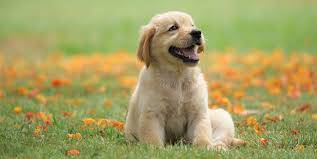

In [23]:
from google.colab import files
uploaded = files.upload()
from PIL import Image
img = Image.open("download.jpg")
img

In [24]:
img_t = preprocess(img)

In [25]:
import torch
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()
out = resnet(batch_t)
out

tensor([[ 1.1385e+00, -2.1988e-01, -3.0145e+00, -3.0127e+00, -3.9027e+00,
         -5.8091e-01, -5.0746e+00, -4.0489e+00, -1.4010e+00, -2.8104e+00,
          1.6503e+00, -1.1403e+00, -1.5026e+00, -2.8891e+00, -1.7068e+00,
         -1.3616e+00, -3.2276e-01, -1.1804e+00, -2.2901e+00, -1.1976e+00,
         -1.3441e+00, -1.1379e+00, -2.4131e+00, -1.5513e+00, -2.8826e+00,
          7.6782e-02,  1.0278e+00,  6.7313e-01, -2.0759e-01,  3.5475e-01,
         -2.3722e+00, -2.0137e+00,  6.1502e-01, -1.6239e+00, -8.6293e-01,
         -1.4881e+00,  4.3275e-02, -2.3138e+00,  9.9514e-01, -1.0851e-01,
         -2.3095e-01,  1.1944e+00,  2.1869e+00,  4.0295e-01, -4.6011e-01,
         -5.9721e-01, -1.0321e+00,  2.1127e+00, -1.2159e+00, -1.9609e+00,
         -3.3477e+00,  4.9446e-01, -2.3896e-01, -1.1784e+00, -3.0449e+00,
         -3.4463e+00, -2.1646e+00, -1.4363e+00, -2.3533e+00, -2.4306e-01,
         -6.0974e-01, -3.0154e+00,  8.3939e-01,  5.0284e-01, -1.2723e+00,
         -1.2283e+00,  1.6843e-01, -1.

In [26]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('203, West_Highland_white_terrier', 90.33905029296875)